# Import packages

In [1]:
from pathlib import Path

import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline

from PIL import Image

from src.utils import get_img_shape

# Set random seed for reproducability

In [2]:
SEED = 100

np.random.seed(SEED)
rng = np.random.default_rng(SEED)

# Get information of images

In [3]:
datadir = Path('../data')
raw_datadir = datadir.joinpath('CCSN_v2')

dataset = torchvision.datasets.ImageFolder(raw_datadir)

idx_to_class = {value: key for key, value in dataset.class_to_idx.items()}
df = pd.DataFrame(dataset.samples, columns=['img_path', 'img_idx'])
df['img_cls'] = df.img_idx.apply(lambda x: idx_to_class[x]).values
print('Number of images:', df.shape[0])
df.head()

Number of images: 2543


img_path  img_idx img_cls
0  ..\data\CCSN_v2\Ac\Ac-N001.jpg        0      Ac
1  ..\data\CCSN_v2\Ac\Ac-N002.jpg        0      Ac
2  ..\data\CCSN_v2\Ac\Ac-N003.jpg        0      Ac
3  ..\data\CCSN_v2\Ac\Ac-N004.jpg        0      Ac
4  ..\data\CCSN_v2\Ac\Ac-N005.jpg        0      Ac

# Draw the number of images in each category

In [17]:
df['img_cls'].value_counts()

Sc    340
Cs    287
Ns    274
Cc    268
Cb    242
Ac    221
St    202
Ct    200
As    188
Cu    182
Ci    139
Name: img_cls, dtype: int64

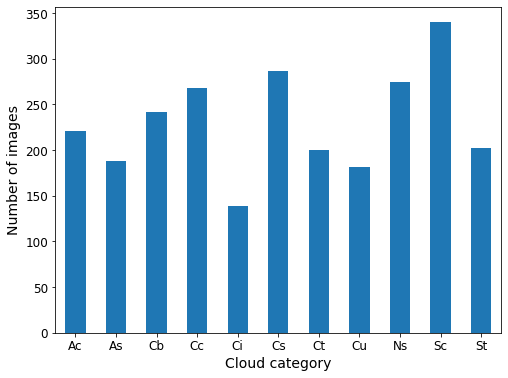

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
df.groupby('img_cls').size().plot(ax=ax, kind='bar', fontsize=12, rot=0)
ax.set_xlabel('Cloud category', fontsize=14)
ax.set_ylabel('Number of images', fontsize=14)
fig.show()

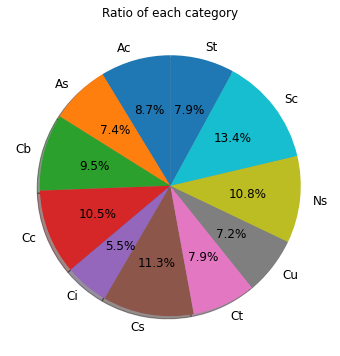

In [5]:
df.groupby('img_cls').size().plot(
    figsize=(8, 6), kind='pie', fontsize=12, autopct='%1.1f%%',
    shadow=True, startangle=90, ylabel='',
    title='Ratio of each category'
)
plt.show()

# Show some images to understand the features in each category

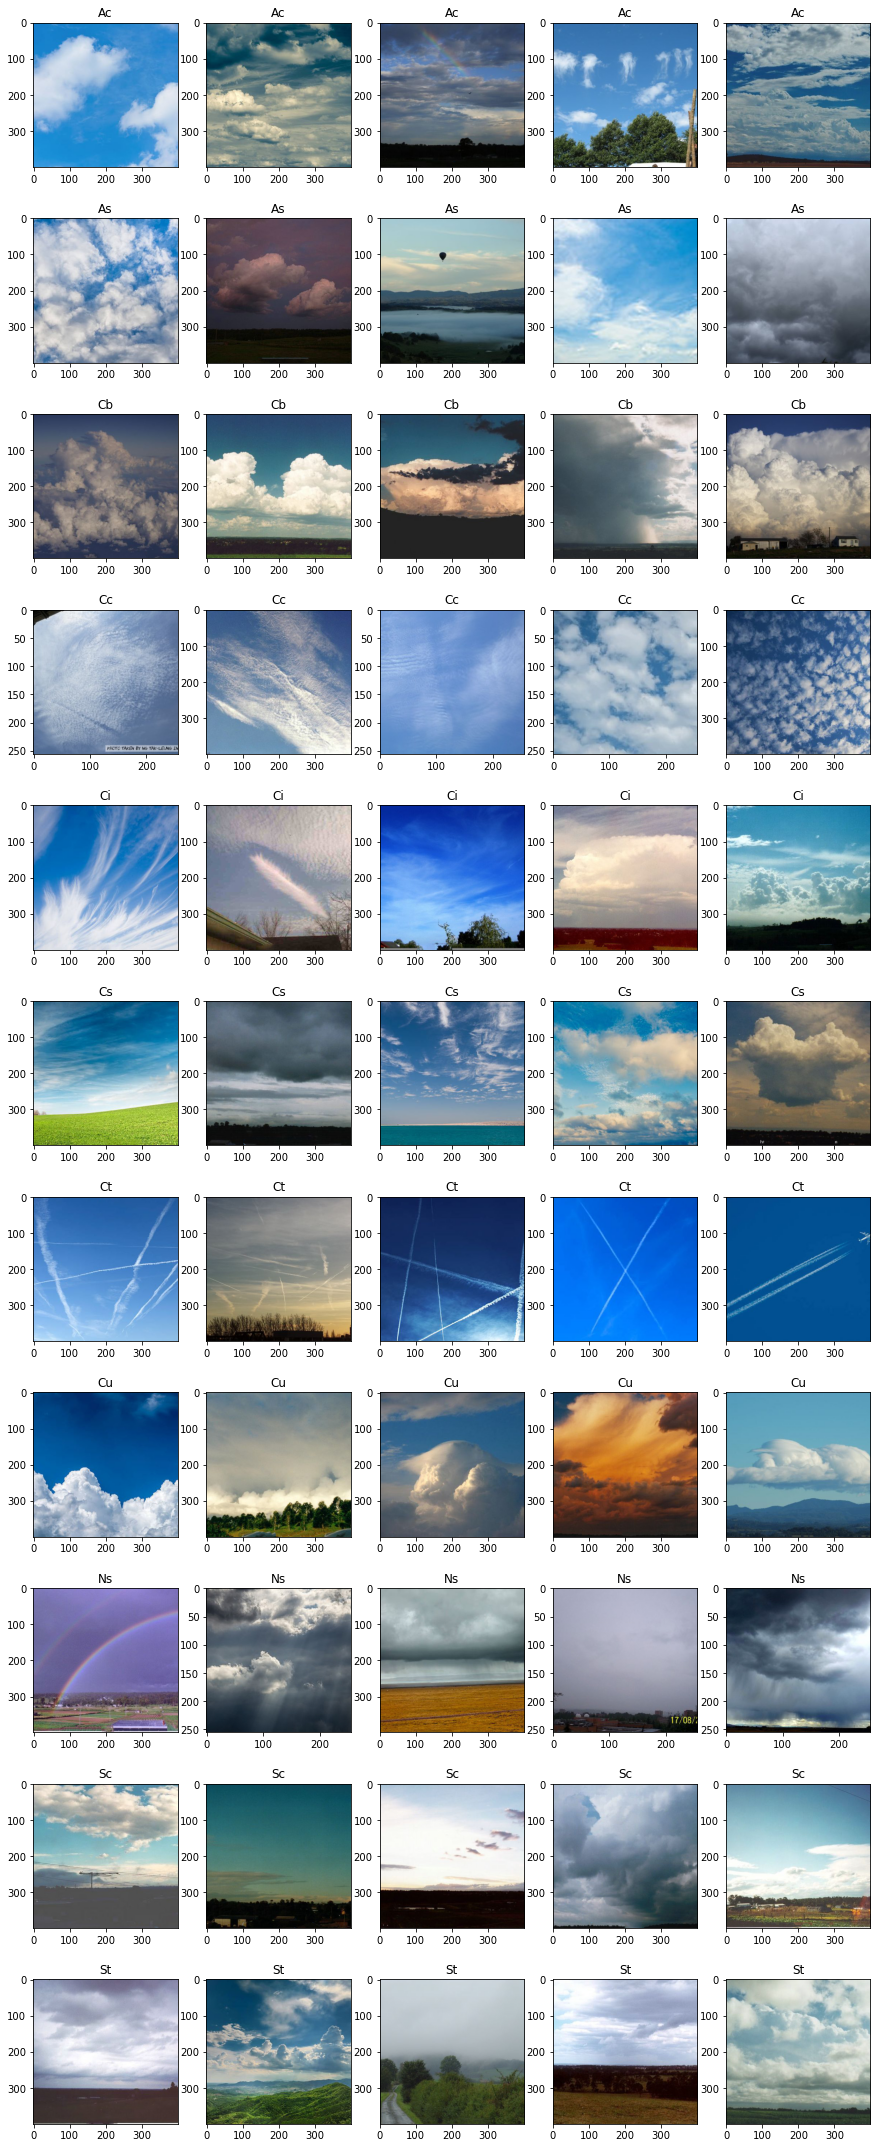

In [7]:
num_show = 5
fig, ax = plt.subplots(11, num_show, figsize=(15, 39))

for img_idx in df['img_idx'].unique():
    img_paths = rng.choice(
        df[df['img_idx'] == img_idx]['img_path'], num_show
    )
    for i, img_path in enumerate(img_paths):
        ax[img_idx, i].imshow(image.imread(img_path))
        ax[img_idx, i].set_title(idx_to_class[img_idx])

# Shape of images

In [10]:
img_shape_dict = {}
for img_path in df['img_path']:
    shape = get_img_shape(img_path)
    img_shape_dict[shape] = img_shape_dict.get(shape, 0) + 1

In [13]:
print('Shape of images:\n', img_shape_dict)

Shape of images:
 {(400, 400, 3): 2332, (256, 256, 3): 211}


# Summary
- The number of images of "Sc" and "Ci" differs by 201, so we may encounter label imbalance.
- The image not only includes clouds, but also other objects.
- Images of different categories have similar tones.
- Images have two shapes, one is (400, 400, 3) and the other is (256, 256, 3).

# References
- https://www.pluralsight.com/guides/image-classification-with-pytorch